<a href="https://colab.research.google.com/github/vanesamp07/Python/blob/main/Segmentaci%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESAFIO 2

In [ ]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
!pip install scikit-fuzzy
import skfuzzy as fuzz
import datetime as dt

In [ ]:
#Cargar el dataset
df = pd.read_excel("Retail_Invoices.xlsx")

In [ ]:
#Leer el dataset
df

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139,7
1,536366,2010-12-01,17850,12,22,2
2,536367,2010-12-01,13047,83,278,12
3,536368,2010-12-01,13047,15,70,4
4,536369,2010-12-01,13047,3,17,1
...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469,1
22186,C581490,2011-12-09,14397,-23,-32,2
22187,C581499,2011-12-09,15498,-1,-224,1
22188,C581568,2011-12-09,15311,-5,-54,1


In [ ]:
#Analisis exploratorio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [ ]:
#Explorar metricas estadisticas
df.describe()

,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,22190,22190.000000,22190.000000,22190.000000,22190.000000
mean,2011-06-29 05:59:15.223073536,15238.498738,221.130599,374.045327,18.333889
min,2010-12-01 00:00:00,12346.000000,-80995.000000,-168469.600000,1.000000
25%,2011-03-29 00:00:00,13755.000000,30.000000,87.962500,3.000000
50%,2011-07-08 00:00:00,15136.000000,120.000000,241.505000,12.000000
75%,2011-10-10 00:00:00,16746.000000,254.000000,418.022500,24.000000
max,2011-12-09 00:00:00,18287.000000,80995.000000,168469.600000,542.000000
std,NaN,1733.149624,1170.215301,2018.482869,23.892111


C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

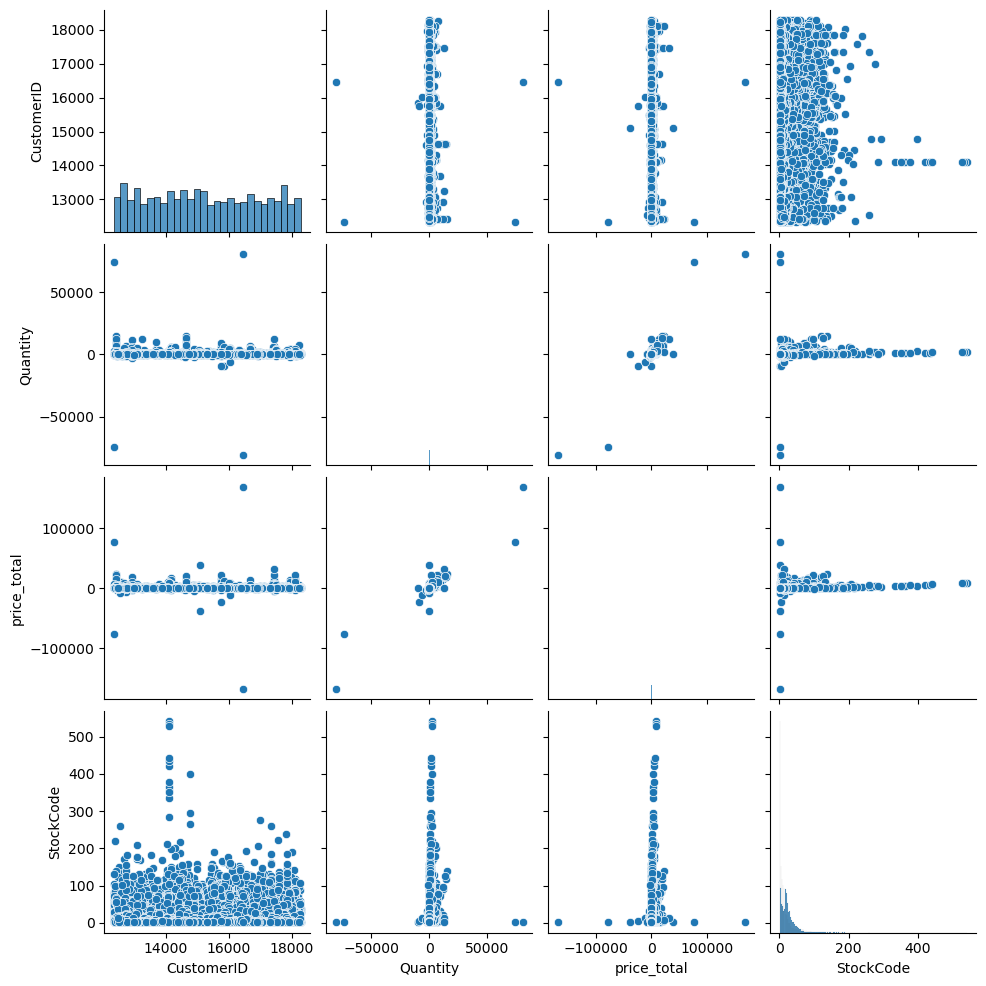

In [ ]:
sns.pairplot(df)

In [ ]:
#Limpiar 'price_total' de caracteres raros
df['price_total'] = df['price_total'].astype(str).str.replace(',', '').str.replace('$', '')

#Convertir a numérico, forzando errores a NaN
df['price_total'] = pd.to_numeric(df['price_total'], errors='coerce')

#Eliminar filas donde price_total sea NaN
df = df.dropna(subset=['price_total'])

In [ ]:
#Se usa método RFM (Recencia, frecuencia y monto)
#Fecha de referencia para calcular "Recency"
fecha_referencia = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Agrupar por CustomerId
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda fecha: (fecha_referencia - fecha.max()).days,
    'InvoiceNo': 'nunique',
    'price_total': 'sum'
}).reset_index()

# Renombrar columnas
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Ver el RFM resultante
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0       12346      326          1         0
1       12347        3          7      4306
2       12348       76          4      1796
3       12349       19          1      1757
4       12350      311          1       334


C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


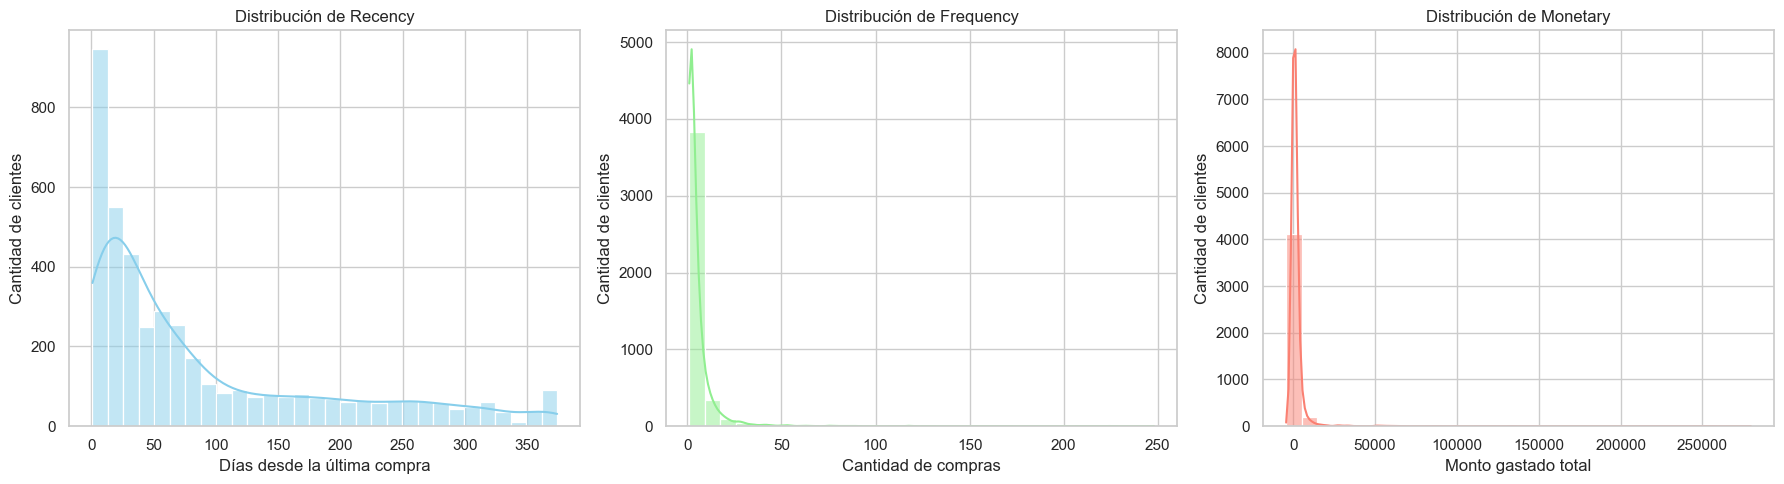

In [ ]:
sns.set(style="whitegrid")

#Crear figura
plt.figure(figsize=(18, 5))

#Gráfico de Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Recency')
plt.xlabel('Días desde la última compra')
plt.ylabel('Cantidad de clientes')

#Gráfico de Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True, bins=30, color='lightgreen')
plt.title('Distribución de Frequency')
plt.xlabel('Cantidad de compras')
plt.ylabel('Cantidad de clientes')

#Gráfico de Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True, bins=30, color='salmon')
plt.title('Distribución de Monetary')
plt.xlabel('Monto gastado total')
plt.ylabel('Cantidad de clientes')

#Visualizar graficos
plt.tight_layout()
plt.show()

C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\cluster\_k

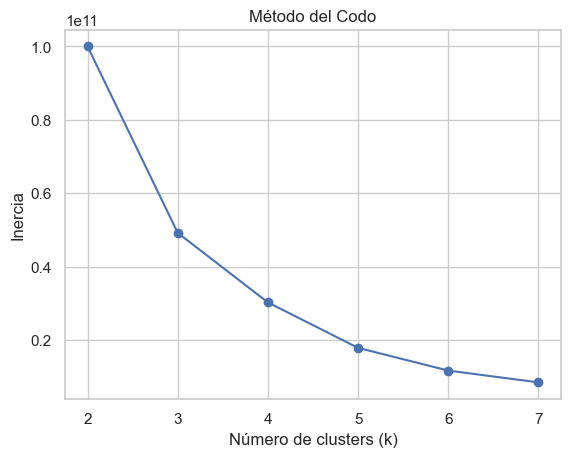

In [ ]:
#Aplicación de algoritmos de clustering
#Aplicar K-MEANS
#Definir datos para clustering (sin CustomerId)
X = rfm[['Recency', 'Frequency', 'Monetary']]

#Método del codo
#Calcular cantidad de clusters optimos
k_values = range(2, 8)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

#Graficar el método del codo
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


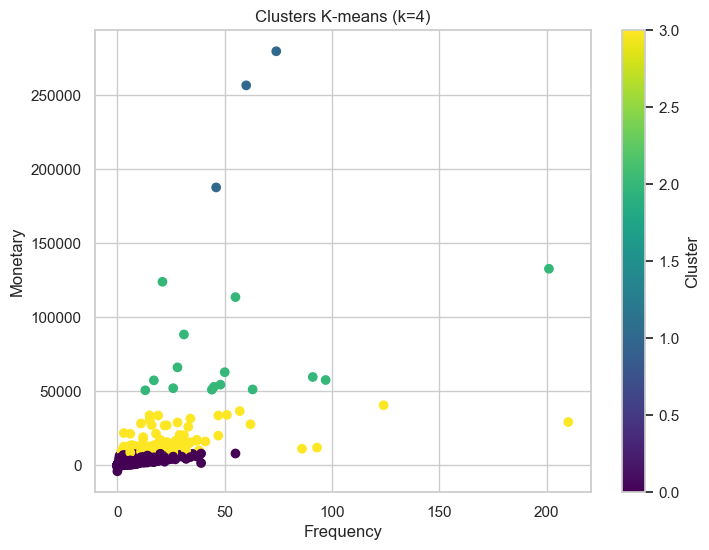

In [ ]:
#Realizar clustering con el valor óptimo de k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

#Aplicar KMeans sobre X
kmeans.fit(X)

#Obtener las etiquetas de cluster
labels = kmeans.labels_

#Agregar los labels a RFM
rfm['Cluster'] = labels

#Visualizar los clusters usando dos dimensiones
plt.figure(figsize=(8,6))
plt.scatter(X['Frequency'], X['Monetary'], c=labels, cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Clusters K-means (k=4)')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


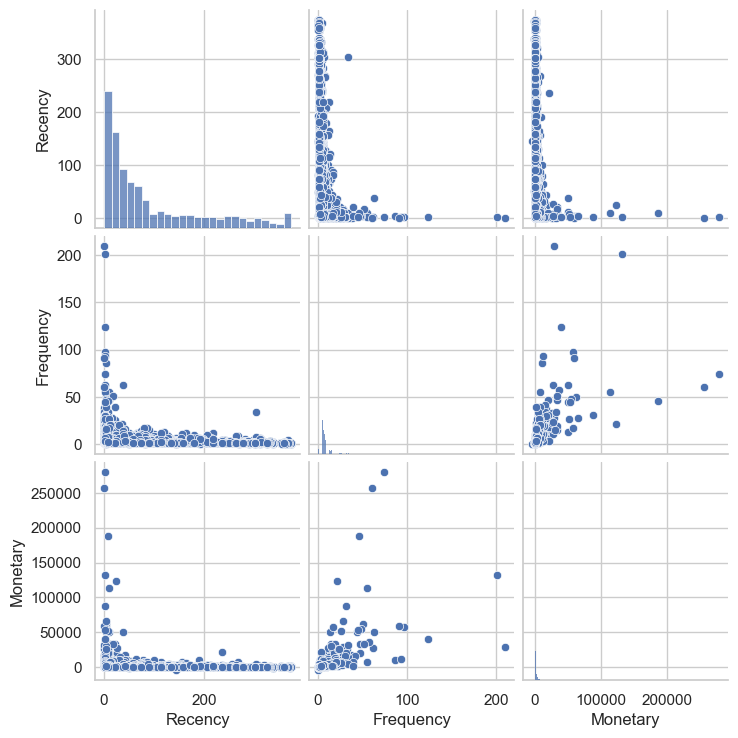

In [ ]:
sns.pairplot(X)

In [ ]:
#Calcular la puntuación de silhouette
silhouette_scores = silhouette_score(X, labels)
#Calcular el índice de Dunn
dunn_index = davies_bouldin_score(X, labels)
print(f'Silhoutter Score : {silhouette_scores}')
print(f'Davies Bouldin Score : {dunn_index}')

Silhoutter Score : 0.8781653014477794
Davies Bouldin Score : 0.462485311811166


In [ ]:
#Aplicación de un segundo algoritmo de clustering
#Clustering Fuzzy CMeans

#Definir una lista de posibles valores de m
m_values = np.arange(1.1, 3.1, 0.1)

#Inicializar listas para almacenar las métricas
silhouette_scores = []
davies_bouldin_scores = []

#Realizar clustering fuzzy con diferentes valores de m y calcular las métricas
'''
cntr: Es una matriz que contiene los centroides finales de los clusters encontrados por el algoritmo Fuzzy C-Means. Cada fila representa un centroide y cada columna representa una característica.

u: Es una matriz que contiene los grados de pertenencia de cada punto a cada cluster. Cada fila representa un punto y cada columna representa un cluster. Los valores en u son números entre 0 y 1 que representan la probabilidad de que un punto pertenezca a cada cluster.

u0: Es una matriz que contiene los grados de pertenencia iniciales de cada punto a cada cluster. Al inicio del algoritmo, estos valores se inicializan aleatoriamente o de alguna otra manera.

d: Es una matriz que contiene las distancias entre los puntos y los centroides finales de los clusters. Cada fila representa un punto y cada columna representa un cluster.

jm: Es el valor de la función objetivo del clustering fuzzy. Representa el valor de la función de costo que se intenta minimizar durante el proceso de clustering.

p: Es un valor que representa el exponente utilizado en la función de costo para el clustering fuzzy.

fpc: Es el índice de partición fuzzy. Representa la fracción de puntos que se encuentran correctamente asignados en los clusters finales.
'''

for m in m_values:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, 3, m, error=0.005, maxiter=1000)
    labels = np.argmax(u, axis=0)

    #Calcular la puntuación de silueta
    silhouette_scores.append(silhouette_score(X, labels))

    #Calcular el índice de Dunn
    dunn_index = davies_bouldin_score(X, labels)
    davies_bouldin_scores.append(dunn_index)

#Encontrar el valor óptimo de m basado en la puntuación de silueta
optimal_index = np.argmax(silhouette_scores)
optimal_m = m_values[optimal_index]

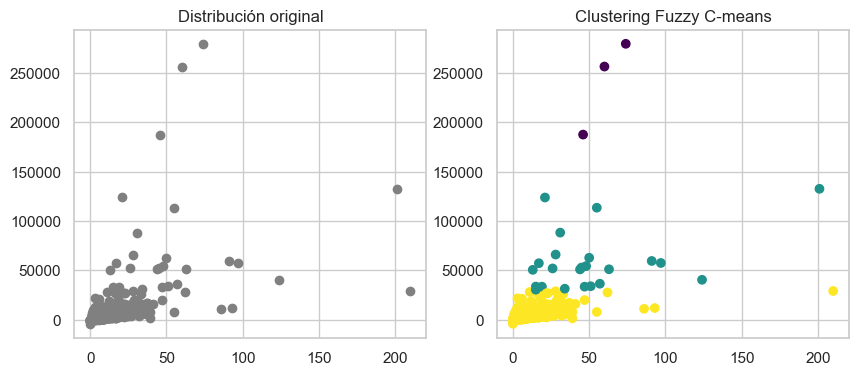

Valor óptimo de m: 1.1


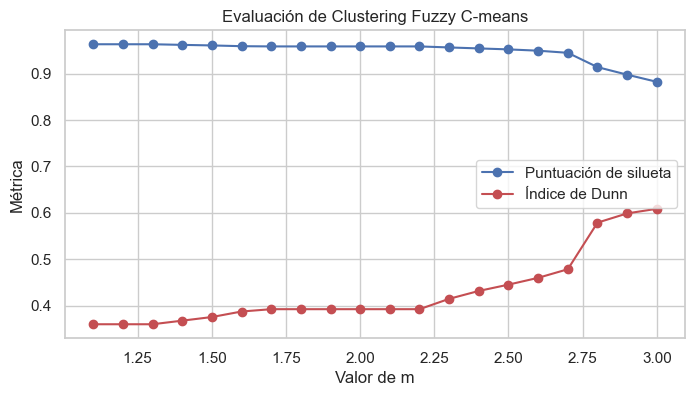

In [ ]:
#Realizar clustering con el valor óptimo de m
optimal_cntr, optimal_u, optimal_u0, optimal_d, optimal_jm, optimal_p, optimal_fpc = fuzz.cluster.cmeans(X.T, 3, optimal_m, error=0.005, maxiter=1000)
optimal_labels = np.argmax(optimal_u, axis=0)

#Graficar los resultados en 2D
plt.figure(figsize=(10, 4))
# Primera subgráfica: puntos sin etiquetas reales (solo para referencia)
plt.subplot(121)
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c='gray')
plt.title('Distribución original')
#Segunda subgráfica: puntos coloreados por cluster Fuzzy
plt.subplot(122)
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=optimal_labels, cmap='viridis')
plt.title('Clustering Fuzzy C-means')
plt.show()

#Imprimir el valor óptimo de m
print(f"Valor óptimo de m: {optimal_m}")

# Graficar la puntuación de silueta y el índice de Dunn
plt.figure(figsize=(8, 4))
plt.plot(m_values, silhouette_scores, 'bo-', label='Puntuación de silueta')
plt.plot(m_values, davies_bouldin_scores, 'ro-', label='Índice de Dunn')
plt.xlabel('Valor de m')
plt.ylabel('Métrica')
plt.title('Evaluación de Clustering Fuzzy C-means')
plt.legend()
plt.show()